# Лекция 4: Линейные системы

## Предыдущая лекция
- Ранг матрицы
- Скелетное разложение
- Низкоранговая аппроксимация
- Сингулярное разложение (SVD)

## Сегодняшняя лекция

- Линейные системы
- Обратная матрица
- Число обусловленности
- Метод Гаусса

## Линейные системы

- Линейные системы уравнений являются базовым инструментом в численной линейной алгебре.

- Они встречаются в:

    - Задачах линейной регрессии
    - Дискретизации дифференциальных/интегральных уравнений в частных производных
    - Линеаризации задач нелинейной регрессии
    - Оптимизации (например, методы Гаусса-Ньютона и Ньютона-Рафсона, условия Каруша-Куна-Такера)

## Линейные уравнения и матрицы
- Из школы мы знаем о линейных уравнениях.

- Система линейных уравнений может быть записана в форме

\begin{align*}
    &2 x + 3 y = 5\quad &\longrightarrow \quad &2x + 3 y + 0 z = 5\\
    &2 x + 3z = 5\quad &\longrightarrow\quad &2 x + 0 y + 3 z = 5\\
    &x + y = 2\quad &\longrightarrow\quad  & 1 x + 1 y + 0 z = 2\\
\end{align*}

## Матричная форма

$$
\begin{pmatrix}
2 & 3 & 0 \\
2 & 0 & 3 \\
1 & 1 & 0 \\
\end{pmatrix}\begin{pmatrix}
x \\
y \\
z 
\end{pmatrix} = 
\begin{pmatrix}
5 \\
5 \\
2
\end{pmatrix}
$$

или просто

$$ A u = f,  $$

где $A$ - матрица размера $3 \times 3$, а $f$ - правая часть

## Переопределенные и недоопределенные системы линейных уравнений

Если система $Au = f$ имеет:

- больше уравнений, чем неизвестных, она называется **переопределенной** системой (как правило, не имеет решения)

- меньше уравнений, чем неизвестных, она называется **недоопределенной** системой (решение не единственно, для получения единственного решения необходимы дополнительные предположения)

## Существование решений

Решение системы линейных уравнений с **квадратной** матрицей $A$

$$A u = f$$

существует тогда и только тогда, когда
* $\det A \ne 0$

или

* матрица $A$ имеет полный ранг.

## Масштабы линейных систем

В разных приложениях типичный размер линейных систем может быть разным.

- Малые: $n \leq 10^4$ (полная матрица может храниться в памяти, **плотная матрица**)
- Средние: $n = 10^4 - 10^6$ (обычно **разреженная** или **структурированная** матрица)
- Большие: $n = 10^8 - 10^9$ (обычно **разреженная** матрица + параллельные вычисления)

## Линейные системы могут быть большими
- Мы берем непрерывную задачу, дискретизируем ее на сетке с $N$ элементами и получаем линейную систему с матрицей $N\times N$.
- Пример сетки вокруг самолета A319
(взято с [сайта GMSH](http://geuz.org/gmsh/)).
<img src="a319_4.png" width=50%>

Основная сложность в том, что эти системы большие: миллионы или миллиарды неизвестных!

## Линейные системы могут быть структурированными

- Хранение $N^2$ элементов матрицы непозволительно даже для $N = 100000$.

**В:** как работать с такими матрицами?

**О:** к счастью, эти матрицы **структурированные** и требуют хранения только $\mathcal{O}(N)$ параметров.

- Наиболее распространенной структурой являются **разреженные матрицы**: такие матрицы имеют только $\mathcal{O}(N)$ ненулевых элементов!

- Пример (одна из известных матриц для $n = 5$):

$$
  \begin{pmatrix}
  2 & -1 & 0 & 0 & 0 \\
  -1 & 2 & -1 & 0 & 0 \\
  0 & -1 & 2 & -1 & 0 \\
  0 & 0 &-1& 2 & -1  \\
  0 & 0 & 0 & -1 & 2 \\
  \end{pmatrix}
$$

- По крайней мере такие матрицы можно хранить
- Также можно быстро умножать такую матрицу на вектор
- Но как решать линейные системы?

## Основные вопросы о линейных системах

1. Какую точность мы получаем в решении (из-за ошибок округления)?
2. Как мы вычисляем решение? (LU-разложение, метод Гаусса)
3. Какова сложность решения линейных систем?

## Как решать линейные системы?
**Важно**: забудьте про определители и **правило Крамера** (оно хорошо работает только для матриц $2 \times 2$)!

## Как решать линейные системы?

Основной инструмент - исключение переменных.

\begin{align*}
    &2 y + 3 x = 5 \quad&\longrightarrow \quad &y = 5/2 -  3/2 x \\
    &2 x + 3z = 5 \quad&\longrightarrow\quad &z = 5/3 - 2/3 x\\
    &z + y = 2 \quad&\longrightarrow\quad  & 5/2 + 5/3 - (3/2 + 2/3) x = 2,\\
\end{align*}

и так находится $x$ (и все предыдущие).

Этот процесс называется **методом Гаусса** и является одним из наиболее широко используемых алгоритмов.

## Метод Гаусса
Метод Гаусса состоит из двух шагов:
1. Прямой ход
2. Обратный ход

## Прямой проход
- На прямом проходе мы исключаем $x_1$:

$$
   x_1 = f_1 - (a_{12} x_2 + \ldots + a_{1n} x_n)/a_{11},
$$

и затем подставляем это в уравнения $2, \ldots, n$.

- Затем мы исключаем $x_2$ и так далее из второго уравнения.

- Важно, что **ведущие элементы** (на которые мы делим) не равны $0$.

## Обратный проход
На обратном проходе:
- решаем уравнение для $x_n$
- подставляем его в уравнение для $x_{n-1}$ и так далее, пока не
вычислим все $x_i, i=1,\ldots, n$.

## Метод Гаусса и LU-разложение

- Метод Гаусса - это вычисление одного из важнейших матричных разложений: **LU-разложения**.

**Определение**: LU-разложением квадратной матрицы $A$ называется представление

$$A = LU,$$

где
- $L$ - **нижнетреугольная** матрица (элементы строго над диагональю равны нулю)
- $U$ - **верхнетреугольная** матрица (элементы строго под диагональю равны нулю)

Это разложение **не единственно**, поэтому обычно требуют, чтобы матрица $L$ имела единицы на диагонали.

**Основная цель** LU-разложения - это решение линейной системы, потому что

$$ A^{-1} f = (L U)^{-1} f = U^{-1} L^{-1} f, $$

и это сводится к решению двух линейных систем **прямой проход**

$$ L y = f, $$

и **обратный проход**

$$ U x = y. $$

Существует ли LU-разложение всегда?

## Сложность метода Гаусса/LU-разложения

- Каждый шаг исключения требует $\mathcal{O}(n^2)$ операций.

- Таким образом, стоимость наивного алгоритма составляет $\mathcal{O}(n^3)$.

**Подумайте**: может ли алгоритм Штрассена помочь здесь?

## Блочное LU-разложение

Мы можем попробовать вычислить **блочную** версию LU-разложения:


$$\begin{pmatrix} A_{11} & A_{12} \\
A_{21} & A_{22}
\end{pmatrix} = \begin{pmatrix} L_{11} & 0 \\
L_{21} & L_{22}
\end{pmatrix} \begin{pmatrix} U_{11} & U_{12} \\
0 & U_{22} 
\end{pmatrix} $$

- Есть две основные операции: вычисление LU-разложения половинных матриц + произведение матриц.

## Существование LU-разложения
- Алгоритм LU-разложения не даст сбой, если **мы не делим на ноль** на каждом шаге метода Гаусса.

**Вопрос:** когда это так, для какого класса матриц?

**Ответ:** это верно для **строго регулярных матриц**.

## Строго регулярные матрицы и LU-разложение

- **Определение.** Матрица $A$ называется *строго регулярной*, если все её **ведущие главные миноры** (т.е. подматрицы, состоящие из первых $k$ строк и $k$ столбцов) невырождены.

- В этом случае всегда существует LU-разложение. Обратное также верно (проверьте!).

**Следствие:** Если $L$ - унитреугольная матрица (единицы на диагонали), то $LU$-разложение единственно. <br>

**Доказательство:** Действительно, $L_1 U_1 = L_2 U_2$ означает $L_2^{-1} L_1 = U_2 U_1^{-1}$. $L_2^{-1} L_1$ - нижнетреугольная матрица с единицами на диагонали. $U_2 U_1^{-1}$ - верхнетреугольная матрица. Следовательно, $L_2^{-1} L_1 = U_2 U_1^{-1} = I$ и $L_1 = L_2$, $U_1 = U_2$.

## LU-разложение для эрмитовых положительно определенных матриц (разложение Холецкого)

- Строго регулярные матрицы имеют LU-разложение.

- Важным **подклассом** строго регулярных матриц является класс **эрмитовых положительно определенных матриц**


**Определение.** Матрица $A$ называется <font color='red'> положительно определенной </font>, если для любого $x: \Vert x \Vert \ne 0$ выполняется

$$
(x, Ax) > 0.
$$
- если это выполняется для $x \in \mathbb{C}^n$, то матрица $A$ должна быть эрмитовой
- если это выполняется для $x \in \mathbb{R}^n$, то матрица $A$ может быть несимметричной

- **Утверждение:** Эрмитова положительно определенная матрица $A$ является строго регулярной и имеет **разложение Холецкого** вида

$$A = RR^*,$$

где $R$ - нижнетреугольная матрица.

- Давайте попробуем доказать этот факт (на доске).

- Иногда это называют "квадратным корнем" из матрицы.

Вычисление LU-разложения

- Во многих случаях вычисление LU-разложения один раз - хорошая идея!

- После того, как разложение найдено (это требует $\mathcal{O}(n^3)$ операций), решение линейных систем с $L$ и $U$ требует только $\mathcal{O}(n^2)$ операций.

Проверьте:

- Решение линейных систем с треугольными матрицами простое (почему?).
- Как мы вычисляем множители $L$ и $U$?

## Когда LU-разложение не работает

- Что происходит, если матрица не является строго регулярной (или **ведущие элементы** в методе Гаусса очень малы?).

- Существует классический пример матрицы $2 \times 2$ с плохим LU-разложением.

- Рассмотрим матрицу

$$
    A = \begin{pmatrix}
    \varepsilon & 1 \\
    1 & 1 
    \end{pmatrix}
$$

- Если $\varepsilon$ достаточно мал, мы **можем** потерпеть неудачу. В отличие от этого, разложение Холецкого **всегда стабильно**.

Давайте рассмотрим демонстрацию.

In [14]:
import numpy as np

eps = 9.9e-15
a = [[eps, 1],[1.0,  1]]
a = np.array(a)
a0 = a.copy()
n = a.shape[0]
L = np.zeros((n, n))
U = np.zeros((n, n))
for k in range(n): #Eliminate one row
    L[k, k] = 1.0
    for i in range(k+1, n):
        L[i, k] = a[i, k]/a[k, k]
        for j in range(k+1, n):
            a[i, j] -= L[i, k]*a[k, j]
    for j in range(k, n):
        U[k, j] = a[k, j]
print('L * U - A:\n', np.dot(L, U) - a0)
L

L * U - A:
 [[0. 0.]
 [0. 0.]]


array([[1.00000000e+00, 0.00000000e+00],
       [1.01010101e+14, 1.00000000e+00]])

## Концепция выбора ведущего элемента

- Мы можем выполнять выбор ведущего элемента, т.е. переставлять строки и столбцы для максимизации $A_{kk}$, на который мы делим.

- Простейшая, но эффективная стратегия - это **выбор ведущей строки**: на каждом шаге выбираем индекс с максимальным по модулю значением и ставим его на диагональ.

- Это дает нам разложение

$$A = P L U,$$

где $P$ - это **матрица перестановок**.


**Вопрос:** Что делает **выбор ведущей строки** хорошим?

**Ответ:** Он хорош тем, что

$$ | L_{ij}|<1, $$

но элементы $U$ могут вырасти до $2^n$! (на практике это встречается очень редко).

- Можете ли вы придумать матрицу, где элементы $U$ растут максимально возможным образом?

## Устойчивость линейных систем

- Существует фундаментальная проблема решения линейных систем, которая не зависит от используемого алгоритма.

- Она возникает, когда элементы матрицы представлены в виде чисел с плавающей точкой или присутствует измерительный шум.

Проиллюстрируем эту проблему на следующем примере.

19.87968164147078


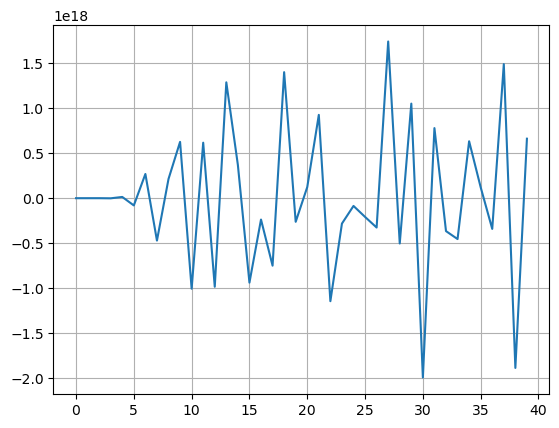

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
n = 40
a = [[1.0/(i + j + 0.5) for i in range(n)] for j in range(n)]
a = np.array(a)
rhs = np.random.normal(size=(n,)) #Right-hand side
x = np.linalg.solve(a, rhs) #This function computes LU-factorization and solves linear system

#And check if everything is fine
er = np.linalg.norm(np.dot(a, x) - rhs) / np.linalg.norm(rhs)
print(er)
plt.plot(x)
plt.grid(True)

- Как видите, ошибка растет с увеличением $n$, и нам нужно выяснить почему.
- **Важный момент** заключается в том, что это не проблема алгоритма: это проблема представления матрицы в памяти.
- Ошибка возникает в момент, когда элементы матрицы вычисляются приближенно.

## Вопросы по демонстрации

- В чем была проблема в предыдущем примере?

- Почему ошибка растет так быстро?

- И здесь мы подходим к одному из основных понятий численной линейной алгебры: понятию **числа обусловленности** матрицы.

Но прежде чем говорить об этом, нам нужно определить **обратную матрицу**.

## Обратная матрица: определение

- Обратная матрица к матрице $A$ определяется как матрица $X$, обозначаемая $A^{-1}$, такая что

$$ AX = XA = I, $$

где $I$ - единичная матрица (т.е. $I_{ij} = 0$ при $i \ne j$ и $1$ в противном случае).
- Вычисление обратной матрицы связано с решением линейных систем. Действительно, $i$-й столбец произведения дает

$$ A x_i = e_i,$$

где $e_i$ - это $i$-й столбец единичной матрицы.
- Таким образом, мы можем применить метод Гаусса для решения этой системы. Более того, если в этом процессе нет деления на ноль (и опорные элементы не зависят от правой части), то систему можно решить.

## Обратная матрица и линейные системы
Если мы вычислили $A^{-1}$, то решение линейной системы

$$Ax = f$$

просто $x = A^{-1} f$.

Действительно,

$$ A(A^{-1} f) = (AA^{-1})f = I f = f. $$

## Ряд Неймана

- Чтобы изучить, почему могут возникать такие большие ошибки в решении (см. пример выше с матрицей Гильберта), нам нужен важный вспомогательный результат.

**Ряд Неймана**:

Если для матрицы $F$ выполняется условие $\Vert F \Vert < 1$, то матрица $(I - F)$ обратима и

$$(I - F)^{-1} = I + F + F^2 + F^3 + \ldots = \sum_{k=0}^{\infty} F^k.$$

Заметим, что это матричная версия геометрической прогрессии.

**Вопрос**: какая норма здесь рассматривается? Какая норма является "наилучшей" в данном случае?

## Доказательство
Доказательство конструктивно. Сначала докажем, что ряд $\sum_{k=0}^{\infty} F^k$ сходится.

Как и в скалярном случае, имеем

$$ (I - F) \sum_{k=0}^N F^k = (I - F^{N+1}) \rightarrow I, \quad N \to +\infty $$

Действительно,

$$ \| (I - F^{N+1}) - I\| = \|F^{N+1}\| \leqslant \|F\|^{N+1} \to 0, \quad N\to +\infty. $$

Мы также можем оценить **норму обратной матрицы**:

$$ \left\Vert \sum_{k=0}^N F^k \right\Vert \leq \sum_{k=0}^N \Vert F \Vert^k \Vert I \Vert \leq \frac{\Vert I \Vert}{1 - \Vert F \Vert} $$

## Малое возмущение обратной матрицы

- Используя этот результат, мы можем оценить, как возмущение матрицы влияет на обратную матрицу.
- Предположим, что возмущение $E$ мало в том смысле, что $\Vert A^{-1} E \Vert < 1$.
- Тогда

$$(A + E)^{-1} = \sum_{k=0}^{\infty} (-A^{-1} E)^k A^{-1}$$

и более того,

$$ \frac{\Vert (A + E)^{-1} - A^{-1} \Vert}{\Vert A^{-1} \Vert} \leq \frac{\Vert A^{-1} \Vert \Vert E \Vert \Vert I \Vert}{1 - \Vert A^{-1} E \Vert}. $$

Как видите, норма обратной матрицы входит в оценку.

## Число обусловленности линейной системы
Рассмотрим **возмущенную** линейную систему:

$$ (A + \Delta A) \widehat{x} = f + \Delta f. $$

## Оценки

$$
\begin{split}
\widehat{x} - x &= (A + \Delta A)^{-1} (f + \Delta f) - A^{-1} f =\\ 
&= \left((A + \Delta A)^{-1} - A^{-1}\right)f + (A + \Delta A)^{-1} \Delta f = \\
& = \Big[ \sum_{k=0}^{\infty} (-A^{-1} \Delta A)^k - I \Big]A^{-1} f + \Big[\sum_{k=0}^{\infty} (-A^{-1} \Delta A)^k \Big]A^{-1} \Delta f  \\
&= \Big[\sum_{k=1}^{\infty} (-A^{-1} \Delta A)^k\Big] A^{-1} f + \Big[\sum_{k=0}^{\infty} (-A^{-1} \Delta A)^k \Big] A^{-1} \Delta f,
\end{split}
$$   

следовательно

$$
\begin{split}
\frac{\Vert \widehat{x} - x \Vert}{\Vert x \Vert} \leq 
&\frac{1}{\|A^{-1}f\|} \Big[ \frac{\|A^{-1}\|\|\Delta A\|}{1 - \|A^{-1}\Delta A\|}\|A^{-1}f\| + \frac{1}{1 - \|A^{-1} \Delta A\|} \|A^{-1} \Delta f\|  \Big] \\
\leq & \frac{\|A\|\|A^{-1}\|}{1 - \|A^{-1}\Delta A\|} \frac{\|\Delta A\|}{\|A\|} + \frac{\|A^{-1}\|}{1 - \|A^{-1}\Delta A\|} \frac{\|\Delta f\|}{\|A^{-1}f\|}\\
\end{split}
$$

Заметим, что $\|AA^{-1}f\| \leq \|A\|\|A^{-1}f\|$, поэтому $\| A^{-1} f \| \geq \frac{\|f\|}{\|A\|}$

Теперь мы готовы получить окончательную оценку

$$
\begin{split}
\frac{\Vert \widehat{x} - x \Vert}{\Vert x \Vert} \leq 
&\frac{\Vert A \Vert \Vert A^{-1} \Vert}{1 - \|A^{-1}\Delta A\|} \Big(\frac{\Vert\Delta A\Vert}{\Vert A \Vert} + \frac{\Vert \Delta f \Vert}{ \Vert f \Vert}\Big) \leq \\
\leq
&\frac{\Vert A \Vert \Vert A^{-1} \Vert}{1 - \|A\|\|A^{-1}\|\frac{\|\Delta A\|}{\|A\|}} \Big(\frac{\Vert\Delta A\Vert}{\Vert A \Vert} + \frac{\Vert \Delta f \Vert}{ \Vert f \Vert}\Big) = \\
= &\frac{\mathrm{cond}(A)}{1 - \mathrm{cond}(A)\frac{\|\Delta A\|}{\|A\|}} \Big(\frac{\Vert\Delta A\Vert}{\Vert A \Vert} + \frac{\Vert \Delta f \Vert}{ \Vert f \Vert}\Big)
\end{split}
$$

Ключевую роль играет **число обусловленности** $\mathrm{cond}(A) = \Vert A \Vert \Vert A^{-1} \Vert$.

## Число обусловленности

- Чем больше число обусловленности, тем меньше цифр мы можем восстановить. Заметим, что число обусловленности различно для разных норм.

- Заметим, что если $\Delta A = 0$, то

$$ \frac{\Vert \widehat{x} - x \Vert}{\Vert x \Vert} \leq \mathrm{cond}(A) \frac{\|\Delta f\|}{\|f\|} $$

- Спектральная норма матрицы равна **наибольшему сингулярному числу**, а сингулярные числа обратной матрицы равны обратным значениям сингулярных чисел.
- Таким образом, число обусловленности в спектральной норме равно отношению наибольшего сингулярного числа к наименьшему.

$$ \mathrm{cond}_2 (A) = \|A\|_2 \|A^{-1}\|_2 = \frac{\sigma_{\max}}{\sigma_{\min}} $$

## Матрица Гильберта (снова)

- Мы также можем попробовать проверить, насколько точна оценка как с единицами в правой части, так и со случайным вектором в правой части.
- Результаты разительно отличаются

Error: 2.2843047554427222e-08 Log Condition number: 19.020186116767867


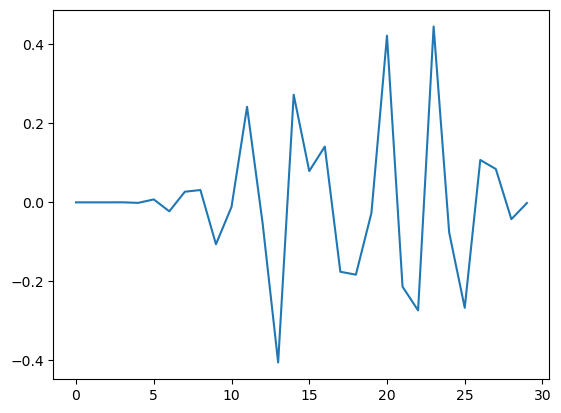

In [25]:
import matplotlib.pyplot as plt
import numpy as np

n = 30
a = [[1.0/(i + j + 0.5) for i in range(n)] for j in range(n)]
a = np.array(a)
#rhs = np.random.normal(size=n)
rhs = np.ones(n) #Right-hand side
#rhs = np.random.randn(n)
#rhs = np.arange(n)
#rhs = (-1)**rhs
f = np.linalg.solve(a, rhs)

#And check if everything is fine
er = np.linalg.norm(a.dot(f) - rhs) / np.linalg.norm(rhs)
cn = np.linalg.cond(a, 2)
print('Error:', er, 'Log Condition number:', np.log10(cn))

u1, s1, v1 = np.linalg.svd(a)
cf = u1.T@rhs
plt.plot(u1[:, 20])
#cf
#cf/s1

А теперь со случайной правой частью...

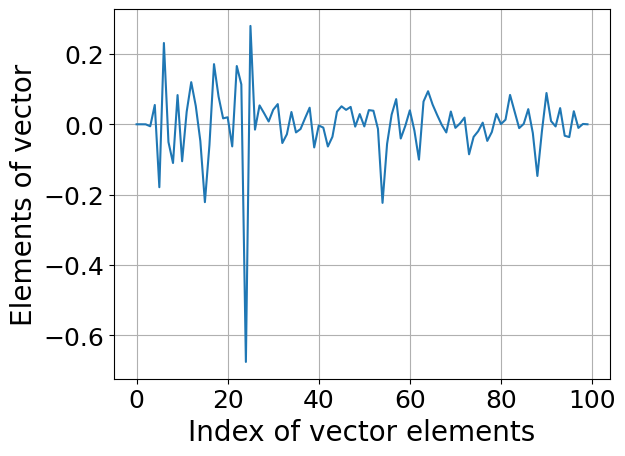

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 100
a = [[1.0/(i - j + 0.5) for i in range(n)] for j in range(n)]
a = np.array(a)
#rhs = np.random.randn(n) #Right-hand side
#f = np.linalg.solve(a, rhs)

#And check if everything is fine
#er = np.linalg.norm(a.dot(f) - rhs) / np.linalg.norm(rhs)
#cn = np.linalg.cond(a)
#print('Error:', er, 'Condition number:', cn)

u, s, v = np.linalg.svd(a)
#rhs = np.random.randn(n)
rhs = np.ones((n,))
plt.plot(u[:, 0])
plt.grid(True)
plt.xlabel("Index of vector elements", fontsize=20)
plt.ylabel("Elements of vector", fontsize=20)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

**Можете ли вы объяснить это?**  

## Переопределенные линейные системы

- Важный класс задач - это **переопределенные линейные системы**, когда количество уравнений больше, чем количество неизвестных.

- Простейший пример, который вы все знаете - это **линейная аппроксимация**, аппроксимация набора 2D точек прямой линией.

- Тогда типичный способ - это минимизировать невязку (**метод наименьших квадратов**)

$$\Vert A x - b \Vert_2 \rightarrow \min$$

## Переопределенная система и матрица Грама

Условие оптимальности - это $0\equiv \nabla \left(\|Ax-b\|_2^2\right)$, где $\nabla$ обозначает градиент. Следовательно,

$$ 0 \equiv \nabla \left(\|Ax-b\|_2^2\right) = 2(A^*A x - A^*b) = 0. $$

Таким образом,

$$ \quad A^* A x = A^* b $$

- Матрица $A^* A$ называется **матрицей Грама**, а система называется **нормальным уравнением**.

- Это не лучший способ решения, так как число обусловленности $A^* A$ является квадратом числа обусловленности $A$ (проверьте почему).

## Псевдообратная матрица

- Матрица $A^* A$ может быть вырожденной в общем случае.
- Поэтому нам нужно ввести понятие псевдообратной матрицы $A^{\dagger}$ такой, что решение задачи наименьших квадратов может быть формально записано как

$$x = A^{\dagger} b.$$

- Матрица $$A^{\dagger} = \lim_{\alpha \rightarrow 0}(\alpha I + A^* A)^{-1} A^*$$ называется псевдообратной матрицей **Мура-Пенроуза** для матрицы $A$.

- Если матрица $A$ имеет полный ранг по столбцам, то $A^* A$ невырождена и мы получаем

$$A^{\dagger} = \lim_{\alpha \rightarrow 0}(\alpha I + A^* A)^{-1} A^* = (A^* A)^{-1} A^*. $$

- Если матрица $A$ квадратная и невырожденная, мы получаем стандартную обратную матрицу $A$:

$$A^{\dagger} = \lim_{\alpha \rightarrow 0}(\alpha I + A^* A)^{-1} A^* = (A^* A)^{-1} A^* = A^{-1} A^{-*} A^* = A^{-1}$$

- Если $A$ имеет линейно зависимые столбцы, то $A^\dagger b$ дает решение, которое имеет минимальную евклидову норму

## Вычисление псевдообратной матрицы через SVD
Пусть $A = U \Sigma V^*$ - SVD разложение матрицы $A$. Тогда,

$$A^{\dagger} = V \Sigma^{\dagger} U^*,$$

где $\Sigma^{\dagger}$ состоит из обратных значений ненулевых сингулярных чисел матрицы $A$. Действительно,

\begin{align*}
A^{\dagger} &= \lim_{\alpha \rightarrow 0}(\alpha I + A^* A)^{-1} A^* = \lim_{\alpha \rightarrow 0}( \alpha VV^* + V \Sigma^2 V^*)^{-1} V \Sigma U^* \\ & = \lim_{\alpha \rightarrow 0}( V(\alpha I + \Sigma^2) V^*)^{-1} V \Sigma U^* = V \lim_{\alpha \rightarrow 0}(\alpha I + \Sigma^2)^{-1} \Sigma U^* = V \Sigma^{\dagger} U^*.
\end{align*}

* Можно проверить, что $\Sigma^{\dagger}$ содержит только обратные значения ненулевых сингулярных чисел.
* Если сингулярные числа малы, можно пропустить их обращение. Это приведет к решению, которое менее чувствительно к шуму в правой части.
* Число обусловленности для евклидовой нормы по-прежнему равно отношению наибольшего и наименьшего ненулевого сингулярного числа.

## Канонический способ решения задачи наименьших квадратов

Заключается в использовании $QR$ разложения.

- Любая матрица может быть представлена в виде произведения

$$ A = Q R, $$

где $Q$ - унитарная матрица, а $R$ - верхнетреугольная матрица (подробности в следующих лекциях).

- Тогда, если $A$ имеет полный ранг по столбцам, то

$$ x = A^{\dagger}b = (A^*A)^{-1}A^*b = ((QR)^*(QR))^{-1}(QR)^*b = (R^*Q^*QR)^{-1}R^*Q^*b = R^{-1}Q^*b.  $$

- Таким образом, нахождение оптимального $x$ эквивалентно решению

$$ Rx = Q^* b. $$

- Поскольку $R$ верхнетреугольная, решение этой линейной системы требует $\mathcal{O}(n^2)$ операций.
- Также это более устойчиво, чем использование псевдообратной матрицы напрямую.

## Расширение системы до большей размерности

- Вместо решения $A^* A x = A^* b$, введем новую переменную $r = Ax - b$ и получим

$$A^* r = 0, \quad r = Ax - b,$$

или в блочной форме

$$ \begin{pmatrix} 0 & A^* \\ A & -I \end{pmatrix} \begin{pmatrix} x \\ r \end{pmatrix} = \begin{pmatrix} 0 \\ b \end{pmatrix}, $$  

общий размер системы равен $(n + m)$, а число обусловленности совпадает с числом обусловленности для $A$
- Как определить число обусловленности для прямоугольной матрицы?


## Пример МНК
Рассмотрим двумерный пример. Предположим, что у нас есть линейная модель

$$y = ax + b$$

и зашумленные данные $(x_1, y_1), \dots (x_n, y_n)$. Тогда линейная система для коэффициентов будет выглядеть следующим образом

$$
\begin{split}
a x_1 &+ b &= y_1 \\
&\vdots \\
a x_n &+ b &= y_n \\
\end{split}
$$

или в матричной форме

$$
\begin{pmatrix}
x_1 & 1 \\
\vdots & \vdots \\
x_n & 1 \\
\end{pmatrix}
\begin{pmatrix}
a \\
b
\end{pmatrix} =
\begin{pmatrix}
y_1 \\
\vdots  \\
y_n \\
\end{pmatrix},
$$

что представляет собой переопределенную систему.

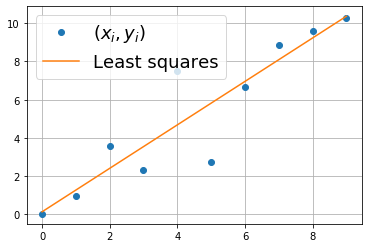

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

a_exact = 1.
b_exact = 2.

n = 10
xi = np.arange(n)
yi = a_exact * xi + b_exact + 2 * np.random.normal(size=n)

A = np.array([xi, np.ones(n)])
coef = np.linalg.pinv(A).T.dot(yi) # coef is [a, b]

plt.plot(xi, yi, 'o', label='$(x_i, y_i)$')
plt.plot(xi, coef[0]*xi + coef[1], label='Least squares')
plt.legend(loc='best', fontsize=18)
plt.grid(True)

# Итоги
- Линейные системы можно решить методом Гаусса, сложность $\mathcal{O}(n^3)$.
 - Линейные системы можно решить с помощью LU-разложения, сложность $\mathcal{O}(n^3)$ для разложения, $\mathcal{O}(n^2)$ для каждого решения
 - Задачу наименьших квадратов можно решить с помощью нормального уравнения (плохо)
 - Задачу наименьших квадратов можно решить с помощью QR-разложения (хорошо) или с помощью расширения (неплохо)
- Без учета структуры мы можем решить до $10^4$ линейных систем на ноутбуке (ограничения памяти)

## Следующая лекция
- Собственные векторы и собственные значения
- Теорема Шура

In [8]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()